# Exploratory analysis of distance metrics

In [2]:
# Import packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style 
#import plotly.plotly as py
import yaml
from sklearn.preprocessing import MinMaxScaler
import itertools
from numpy.polynomial.polynomial import polyfit

with open('config_file.yaml', 'r') as f:
    config = yaml.load(f)

In [15]:
# Read dataset
df = pd.read_csv(config['ROOT_PATH'] + '/data/' + 'proposals_dists.csv', sep=',', encoding='utf-8')

In [26]:
pd.set_option('display.max_columns', None)
df.sort_values(['eucl_dist_ca'], ascending=True)

,Unnamed: 0,proposal,origin,scope,district,category,subcategory,author,author_name,created_at,votes,comments,url,status,title_es,title_ca,description_es,description_ca,group_author,total_positive_comments,total_neutral_comments,total_negative_comments,rejected_message,language,action,proposal_list,title_ca_action,description_ca_action,title_es_action,description_es_action,cos_dist_ca,eucl_dist_ca,jacc_dist_ca,manh_dist_ca,cos_dist_es,eucl_dist_es,jacc_dist_es,manh_dist_es
4785,4785,3050.0,official,district,Les Corts,Bon viure,Cicles de vida,1,Ajuntament de Barcelona,2/18/2016,28.0,1.0,https://decidim.barcelona.cat/proposals/promou...,accepted,Promover el uso de equipamientos fuera de los ...,Promoure l'Ãs d'Equipaments Fora dels horaris...,Estudiar la empleabilidad de los espacios de l...,Estudiar l'ocupabilitat dels espais dels Equip...,administration,1.0,0.0,0.0,None,ca,6020.0,['3050'],Promoure l'ús d'equipaments fora dels horaris ...,Estudiar l’ocupabilitat dels espais dels equip...,Promover el uso de equipamientos fuera de los ...,Estudiar la empleabilidad de los espacios de l...,0.014,0.0,1.0,0.117,0.000,0.0,0.000,0.000
948,948,8940.0,meeting,district,Eixample,Bon viure,Equitat de gènere i diversitat sexual,9283,eixampledelibera,4/6/2016,2.0,0.0,https://decidim.barcelona.cat/proposals/accion...,accepted,Acciones para atender la infancia y la adolesc...,Accions per NOTAS: QUEJA la infància il 'adole...,Establecer nuevos criterios para detectar y tr...,Establir nous Criteris per detectar i tractar ...,citizens,0.0,0.0,0.0,None,ca,5825.0,"['2855', '8940', '9355']",Accions per atendre la infància i l'adolescènc...,Establir nous criteris per detectar i tractar ...,Acciones para atender la infancia y la adolesc...,Establecer nuevos criterios para detectar y tr...,0.015,0.0,1.0,0.119,0.011,0.0,1.000,0.145
9329,9329,651.0,official,district,Sants Montjuïc,Transició ecològica,Urbanisme per als barris,1,Ajuntament de Barcelona,29/01/2016,32.0,3.0,https://decidim.barcelona/pam/proposals/superilla,accepted,supermanzana,Superilla,Redefinir el espacio público con el objetivo d...,Redefinir l'espai públic amb l'Objectiu de don...,administration,1.0,1.0,1.0,None,ca,5352.0,"['651', '3295', '7337']",Superilla,Redefinir l’espai públic amb l’objectiu de don...,supermanzana,Redefinir el espacio público con el objetivo d...,0.010,0.0,1.0,0.109,0.008,0.0,1.000,0.107
952,952,861.0,official,city,NaN,Bon viure,Educació i coneixement,1,Ajuntament de Barcelona,1/29/2016,21.0,1.0,https://decidim.barcelona.cat/proposals/educac...,accepted,Educación comunitaria y trabajo educativo en r...,Educació comunitària i treball educatiu en xar...,"Promover la educación comunitaria y en red, de...","Promoure l'educació comunitària i en xarxa, de...",administration,1.0,0.0,0.0,None,ca,5561.0,"['861', '2812', '2817', '2849', '3667', '3999'...",Educació comunitària i treball educatiu en xar...,Promoure l’educació comunitària i en xarxa sot...,Educación comunitaria y trabajo educativo en r...,Promover la educación comunitaria y en red baj...,0.017,0.0,1.0,0.155,0.019,0.0,1.000,0.170
9330,9330,660.0,official,district,Sants Montjuïc,Transició ecològica,Mobilitat sostenible,1,Ajuntament de Barcelona,29/01/2016,27.0,1.0,https://decidim.barcelona/pam/proposals/millor...,accepted,Mejora de la distribución de mercancías en la ...,Millora de la distribució de Mercaderies al ca...,Crear una plataforma de mercancías que abarque...,Crear una plataforma de Mercaderies que abasti...,administration,1.0,0.0,0.0,None,ca,5361.0,['660'],Millorar la distribució de mercaderies al carr...,Crear una plataforma de mercaderies que abasti...,Mejorar la distribución de mercancías en la ca...,Crear una plataforma de mercancías que abarque...,0.002,0.0,1.0,0.059,0.000,0.0,1.000,0.026
5568,5568,2878.0,official,city,NaN,Bon viure,"Migració, interculturalitat i discriminació zero",1,Ajuntament de Barcelona,2/18/2016,18.0,11.0,https://decidim.barcelona.cat/proposals/impuls...,accepted,Impulsar el 

In [25]:
df.loc[df['proposal']==810]

,Unnamed: 0,proposal,origin,scope,district,category,subcategory,author,author_name,created_at,votes,comments,url,status,title_es,title_ca,description_es,description_ca,group_author,total_positive_comments,total_neutral_comments,total_negative_comments,rejected_message,language,action,proposal_list,title_ca_action,description_ca_action,title_es_action,description_es_action,cos_dist_ca,eucl_dist_ca,jacc_dist_ca,manh_dist_ca,cos_dist_es,eucl_dist_es,jacc_dist_es,manh_dist_es
9,9,810.0,official,district,Sant Andreu,Economia plural,Turisme sostenible,1,Ajuntament de Barcelona,1/29/2016,20.0,2.0,https://decidim.barcelona.cat/proposals/rutes-...,accepted,Rutas guiadas por San Andrés,Rutes guiades per Sant Andreu,Ofrecer visitas guiadas para dar a conocer los...,Oferir visites guiades per donar a Conèixer a ...,administration,0.0,2.0,0.0,None,ca,5511.0,"['810', '5908']",Rutes guiades per Sant Andreu,Oferir visites guiades per donar a conèixer el...,Rutas guiadas por San Andrés,Ofrecer visitas guiadas para dar a conocer los...,0.008,0.0,1.0,0.114,0.024,0.001,1.0,0.2


## Correlation matrix

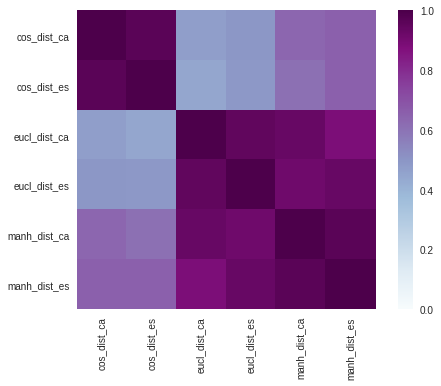

In [22]:
# Correlation matrix
dists_corr = df[['cos_dist_ca', 'cos_dist_es', 'eucl_dist_ca', 'eucl_dist_es', 'manh_dist_ca', 'manh_dist_es']]
corr = dists_corr.corr()
sns.heatmap(corr, xticklabels = corr.columns, cmap = "BuPu", yticklabels = corr.columns, square = True, vmin=0, vmax=1)

## Plot I: Distribution of distances by author

In [5]:
# Plot I: Distribution of distances by author
df['official_dummy'] =  np.where(df['author_name'] == 'Ajuntament de Barcelona', 1, 0)
df['official_dummy_name'] =  np.where(df['author_name'] == 'Ajuntament de Barcelona', 'Administration', 'Citizens')
df_grouped = df.groupby('official_dummy')

In [6]:
# function for the plot
def multivariateGrid(col_x, col_y, col_k, df, k_is_color=True, scatter_alpha=0.3):
    df = df.dropna(subset=[col_x, col_y])
    def colored_scatter(x, y, c=['orange', 'purple']):
        def scatter(*args, **kwargs):
            args = (x, y)
            if c is not None:
                kwargs['c'] = c
                kwargs['alpha'] = scatter_alpha
            plt.scatter(*args, **kwargs)
            #sns.lmplot(x, y)
            #b, m = polyfit(x, y, 1)
            #plt.plot(x, b + m * x, '-', color = c)
            

        return scatter

    g = sns.JointGrid(
        x=col_x,
        y=col_y,
        data=df
    )
    colors = itertools.cycle(["purple", "orange"])
    color = None
    legends=[]
    for name, df_group in df.groupby(col_k, sort=False):
        legends.append(name)
        if k_is_color:
            color=next(colors)
        g.plot_joint(
            colored_scatter(df_group[col_x],df_group[col_y], color), 
        )
        sns.distplot(
            df_group[col_x].values,
            ax=g.ax_marg_x,
            color=color,
        )
        sns.distplot(
            df_group[col_y].values,
            ax=g.ax_marg_y,
            color=color,            
            vertical=True
        )
    plt.legend(legends, loc = 'best', fontsize = 'large', fancybox = True)
    plt.xlabel('Catalan', fontsize = 'large', fontweight='bold')
    plt.ylabel('Spanish', fontsize = 'large', fontweight='bold')

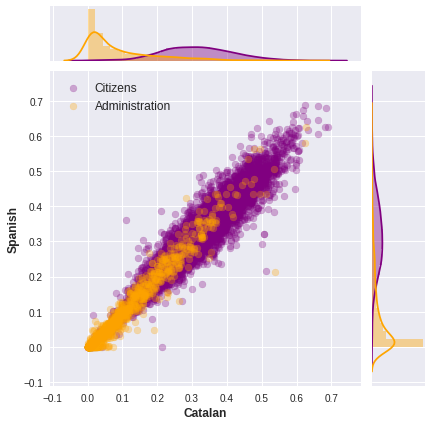

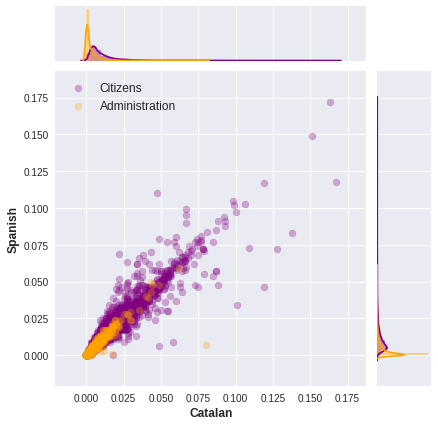

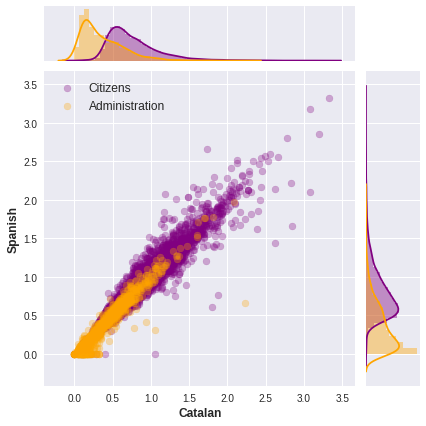

In [7]:
style.use('seaborn')
multivariateGrid('cos_dist_ca', 'cos_dist_es', 'official_dummy_name', df)

multivariateGrid('eucl_dist_ca', 'eucl_dist_es', 'official_dummy_name', df)
style.use('seaborn')
multivariateGrid('manh_dist_ca', 'manh_dist_es', 'official_dummy_name', df)

## Plot II: Distribution of distances of proposals within a same action

In [8]:
# Plot II: Distribution of distances of proposals within a same action
# delete actions with no 'Ajuntament de Barcelona' as author in any proposals
df_aux = df.groupby('action').filter(lambda df: (df.author_name == 'Ajuntament de Barcelona').any())

# delete actions with only one proposals
df_aux = df.groupby('action').filter(lambda df: (len(df)) > 1)

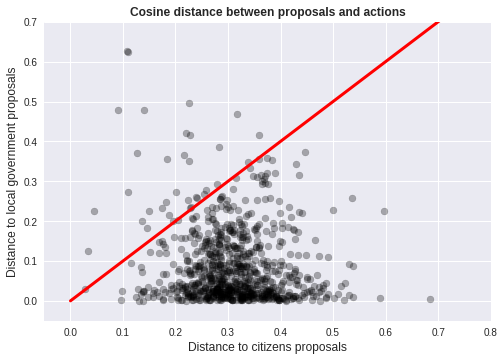

In [13]:
# Cosinus distance
dists_ajt = df_aux.loc[df_aux['official_dummy'] == 1]
dists_ajt = dists_ajt.groupby(['action']).cos_dist_ca.mean().reset_index()
dists_ajt.columns.values[1] = "cos_dist_ajt"

dists_others = df_aux.loc[df_aux['official_dummy'] == 0]
dists_others = dists_others.groupby(['action']).cos_dist_ca.mean().reset_index()
dists_others.columns.values[1] = "cos_dist_others"

data_mean = pd.merge(dists_ajt, dists_others)

# plots
style.use('seaborn')
plt.scatter(data_mean.cos_dist_others, data_mean.cos_dist_ajt, color = 'k', alpha = 0.3)
plt.title("Cosine distance between proposals and actions", fontsize = 'large', fontweight='bold')
plt.xlabel("Distance to citizens proposals", fontsize = 'large')
plt.ylabel("Distance to local government proposals", fontsize = 'large')
plt.plot([0,1], [0,1], color = 'red', linewidth = 3)
plt.xlim((-0.05, 0.8))
plt.ylim((-0.05, 0.7))
plt.show()

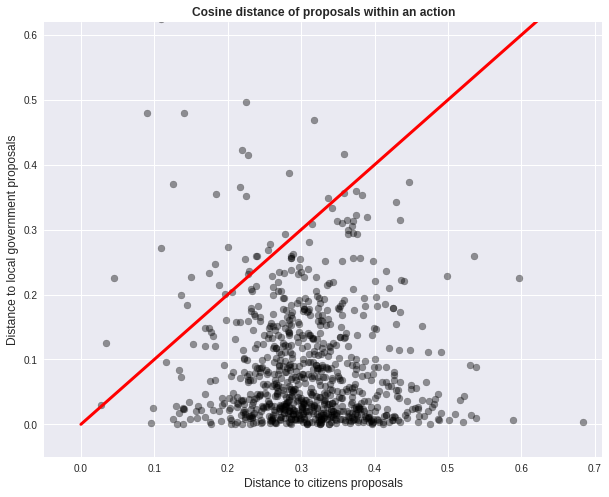

In [14]:
# Cosinus distance
dists_ajt = df_aux.loc[df_aux['official_dummy'] == 1]
dists_ajt = dists_ajt.groupby(['action']).cos_dist_ca.mean().reset_index()
dists_ajt.columns.values[1] = "cos_dist_ajt"

dists_others = df_aux.loc[df_aux['official_dummy'] == 0]
dists_others = dists_others.groupby(['action']).cos_dist_ca.mean().reset_index()
dists_others.columns.values[1] = "cos_dist_others"

data_mean = pd.merge(dists_ajt, dists_others)

# plots
style.use('seaborn')
plt.figure(figsize=(10,8))
plt.scatter(data_mean.cos_dist_others, data_mean.cos_dist_ajt, color = 'k', alpha = 0.4)
plt.title("Cosine distance of proposals within an action", fontsize = 'large', fontweight='bold')
plt.xlabel("Distance to citizens proposals", fontsize = 'large')
plt.ylabel("Distance to local government proposals", fontsize = 'large')
plt.plot([0,1], [0,1], color = 'red', linewidth = 3)
plt.xlim((-0.05, 0.71))
plt.ylim((-0.05, 0.62))
plt.show()

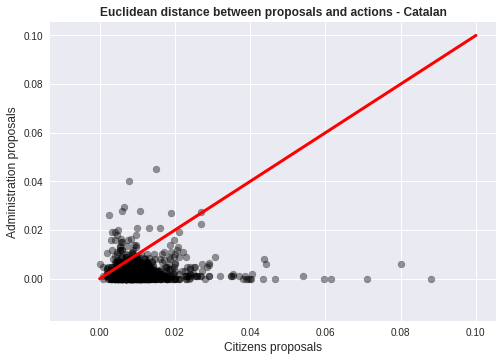

In [58]:
# Euclidean distance
dists_ajt = df_aux.loc[df_aux['official_dummy'] == 1]
dists_ajt = dists_ajt.groupby(['action']).eucl_dist_ca.mean().reset_index()
dists_ajt.columns.values[1] = "eucl_dist_ajt"

dists_others = df_aux.loc[df_aux['official_dummy'] == 0]
dists_others = dists_others.groupby(['action']).eucl_dist_ca.mean().reset_index()
dists_others.columns.values[1] = "eucl_dist_others"

data_mean = pd.merge(dists_ajt, dists_others)

# plots
style.use('seaborn')
plt.scatter(data_mean.eucl_dist_others, data_mean.eucl_dist_ajt, color = 'k', alpha = 0.4)
plt.title("Euclidean distance between proposals and actions - Catalan", fontsize = 'large', fontweight='bold')
plt.xlabel("Citizens proposals", fontsize = 'large')
plt.ylabel("Administration proposals", fontsize = 'large')
plt.plot([0,0.1], [0,0.1], color = 'red', linewidth = 3)
#plt.xlim((-0.05, 0.33))
#plt.ylim((-0.05, 0.33))
plt.show()

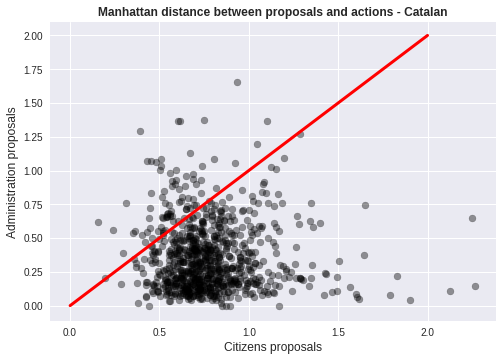

In [60]:
# Manhattan distance
dists_ajt = df_aux.loc[df_aux['official_dummy'] == 1]
dists_ajt = dists_ajt.groupby(['action']).manh_dist_ca.mean().reset_index()
dists_ajt.columns.values[1] = "manh_dist_ajt"

dists_others = df_aux.loc[df_aux['official_dummy'] == 0]
dists_others = dists_others.groupby(['action']).manh_dist_ca.mean().reset_index()
dists_others.columns.values[1] = "manh_dist_others"

data_mean = pd.merge(dists_ajt, dists_others)

# plots
style.use('seaborn')
plt.scatter(data_mean.manh_dist_others, data_mean.manh_dist_ajt, color = 'k', alpha = 0.4)
plt.title("Manhattan distance between proposals and actions - Catalan", fontsize = 'large', fontweight='bold')
plt.xlabel("Citizens proposals", fontsize = 'large')
plt.ylabel("Administration proposals", fontsize = 'large')
plt.plot([0,2], [0,2], color = 'red', linewidth = 3)
#plt.xlim((-0.05, 0.33))
#plt.ylim((-0.05, 0.33))
plt.show()